In [1]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from itertools import combinations
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm
import pickle

In [2]:
import xgb_general_argmax_func as xgbooster

In [3]:
train = pd.read_csv('/Users/roberttejada/Desktop/gaia_data_ml/sm_trainingset_parlabels.csv')
#skymapper_refset = pd.read_csv(io.BytesIO(uploaded2['skymapper_merged_all.csv']))

In [4]:
def abs_mag(p, m):
    return m - 5*np.log10((1000/(p)).astype(np.float64)) + 5


def ccombinator(y):
    mags = pd.DataFrame(index=y.index)
    for a, b, in combinations(y.columns, 2):
        mags['{}-{}'.format(a, b)] = y[a] - y[b]
    c = mags
    return c


train['M_G'] = abs_mag(train['parallax'].values,
                       train['phot_g_mean_mag'].values)

flist = ['i_psf', 'z_psf',
        'h_m', 'j_m', 'k_m',
        'w1mpro', 'w2mpro']
label_list = ['par_label']

/Users/roberttejada/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/roberttejada/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.010553	validation_0-rmse:0.452298	validation_0-logloss:0.601844	validation_1-error:0.011263	validation_1-rmse:0.452388	validation_1-logloss:0.602006
[1]	validation_0-error:0.010046	validation_0-rmse:0.409762	validation_0-logloss:0.527106	validation_1-error:0.010553	validation_1-rmse:0.409937	validation_1-logloss:0.527396
[2]	validation_0-error:0.009843	validation_0-rmse:0.371826	validation_0-logloss:0.464664	validation_1-error:0.010249	validation_1-rmse:0.372048	validation_1-logloss:0.465003
[3]	validation_0-error:0.009538	validation_0-rmse:0.33785	validation_0-logloss:0.41155	validation_1-error:0.010079	validation_1-rmse:0.33821	validation_1-logloss:0.412061
[4]	validation_0-error:0.0092	validation_0-rmse:0.307428	validation_0-logloss:0.36638	validation_1-error:0.009978	validation_1-rmse:0.307877	validation_1-logloss:0.366973
[5]	validation_0-error:0.009403	validation_0-rmse:0.280347	validation_0-logloss:0.327404	validation_1-error:0.010113	validation_1-rmse:0

[17]	validation_0-error:0.007577	validation_0-rmse:0.114325	validation_0-logloss:0.104604	validation_1-error:0.008118	validation_1-rmse:0.115227	validation_1-logloss:0.105208
[18]	validation_0-error:0.007577	validation_0-rmse:0.108433	validation_0-logloss:0.096284	validation_1-error:0.008152	validation_1-rmse:0.109557	validation_1-logloss:0.096997
[19]	validation_0-error:0.007441	validation_0-rmse:0.103271	validation_0-logloss:0.088806	validation_1-error:0.008016	validation_1-rmse:0.104615	validation_1-logloss:0.089623
[20]	validation_0-error:0.007238	validation_0-rmse:0.098733	validation_0-logloss:0.082113	validation_1-error:0.007644	validation_1-rmse:0.100238	validation_1-logloss:0.083003
[21]	validation_0-error:0.007407	validation_0-rmse:0.09488	validation_0-logloss:0.076122	validation_1-error:0.007847	validation_1-rmse:0.096452	validation_1-logloss:0.077023
[22]	validation_0-error:0.007137	validation_0-rmse:0.09141	validation_0-logloss:0.070643	validation_1-error:0.007712	validatio

[4]	validation_0-error:0.009132	validation_0-rmse:0.307499	validation_0-logloss:0.366488	validation_1-error:0.010891	validation_1-rmse:0.308612	validation_1-logloss:0.367933
[5]	validation_0-error:0.009234	validation_0-rmse:0.280489	validation_0-logloss:0.327581	validation_1-error:0.010857	validation_1-rmse:0.281759	validation_1-logloss:0.329121
[6]	validation_0-error:0.008727	validation_0-rmse:0.256357	validation_0-logloss:0.294035	validation_1-error:0.010519	validation_1-rmse:0.257818	validation_1-logloss:0.295692
[7]	validation_0-error:0.008862	validation_0-rmse:0.23478	validation_0-logloss:0.264568	validation_1-error:0.010587	validation_1-rmse:0.236511	validation_1-logloss:0.266405
[8]	validation_0-error:0.008524	validation_0-rmse:0.215148	validation_0-logloss:0.238371	validation_1-error:0.010282	validation_1-rmse:0.217127	validation_1-logloss:0.240339
[9]	validation_0-error:0.008693	validation_0-rmse:0.197849	validation_0-logloss:0.215489	validation_1-error:0.010012	validation_1-r

[21]	validation_0-error:0.007137	validation_0-rmse:0.094119	validation_0-logloss:0.075539	validation_1-error:0.007746	validation_1-rmse:0.097867	validation_1-logloss:0.077879
[22]	validation_0-error:0.007171	validation_0-rmse:0.090657	validation_0-logloss:0.070099	validation_1-error:0.007746	validation_1-rmse:0.094695	validation_1-logloss:0.072577
[23]	validation_0-error:0.007069	validation_0-rmse:0.087808	validation_0-logloss:0.065304	validation_1-error:0.007543	validation_1-rmse:0.09215	validation_1-logloss:0.067941
[24]	validation_0-error:0.007002	validation_0-rmse:0.085113	validation_0-logloss:0.060855	validation_1-error:0.007543	validation_1-rmse:0.08964	validation_1-logloss:0.063578
[25]	validation_0-error:0.006765	validation_0-rmse:0.082624	validation_0-logloss:0.056735	validation_1-error:0.007543	validation_1-rmse:0.087435	validation_1-logloss:0.059596
[26]	validation_0-error:0.006663	validation_0-rmse:0.080569	validation_0-logloss:0.053086	validation_1-error:0.007475	validatio

[8]	validation_0-error:0.009268	validation_0-rmse:0.215941	validation_0-logloss:0.239263	validation_1-error:0.010316	validation_1-rmse:0.217639	validation_1-logloss:0.240916
[9]	validation_0-error:0.008997	validation_0-rmse:0.198812	validation_0-logloss:0.216605	validation_1-error:0.010046	validation_1-rmse:0.200685	validation_1-logloss:0.218326
[10]	validation_0-error:0.008963	validation_0-rmse:0.18327	validation_0-logloss:0.196288	validation_1-error:0.009843	validation_1-rmse:0.185335	validation_1-logloss:0.198074
[11]	validation_0-error:0.008557	validation_0-rmse:0.169399	validation_0-logloss:0.178257	validation_1-error:0.009809	validation_1-rmse:0.17176	validation_1-logloss:0.180175
[12]	validation_0-error:0.008388	validation_0-rmse:0.157193	validation_0-logloss:0.162301	validation_1-error:0.00964	validation_1-rmse:0.159878	validation_1-logloss:0.164374
[13]	validation_0-error:0.00849	validation_0-rmse:0.146507	validation_0-logloss:0.14824	validation_1-error:0.009775	validation_1-r

[25]	validation_0-error:0.006224	validation_0-rmse:0.081533	validation_0-logloss:0.056513	validation_1-error:0.007509	validation_1-rmse:0.086773	validation_1-logloss:0.05908
[26]	validation_0-error:0.006291	validation_0-rmse:0.079462	validation_0-logloss:0.052853	validation_1-error:0.007509	validation_1-rmse:0.085021	validation_1-logloss:0.055547
[27]	validation_0-error:0.006325	validation_0-rmse:0.077737	validation_0-logloss:0.049614	validation_1-error:0.007441	validation_1-rmse:0.083532	validation_1-logloss:0.052411
[28]	validation_0-error:0.006122	validation_0-rmse:0.075902	validation_0-logloss:0.046509	validation_1-error:0.007407	validation_1-rmse:0.082042	validation_1-logloss:0.049457
[29]	validation_0-error:0.006021	validation_0-rmse:0.07436	validation_0-logloss:0.043769	validation_1-error:0.00734	validation_1-rmse:0.080981	validation_1-logloss:0.046962
Accuracy: 99.2660240149%
Finished with step: 7
[0]	validation_0-error:0.010519	validation_0-rmse:0.452272	validation_0-logloss:0

[12]	validation_0-error:0.007712	validation_0-rmse:0.155592	validation_0-logloss:0.160803	validation_1-error:0.008693	validation_1-rmse:0.157166	validation_1-logloss:0.162041
[13]	validation_0-error:0.007678	validation_0-rmse:0.144787	validation_0-logloss:0.146655	validation_1-error:0.008625	validation_1-rmse:0.146559	validation_1-logloss:0.147987
[14]	validation_0-error:0.007543	validation_0-rmse:0.135164	validation_0-logloss:0.134036	validation_1-error:0.008354	validation_1-rmse:0.137058	validation_1-logloss:0.135394
[15]	validation_0-error:0.007407	validation_0-rmse:0.126504	validation_0-logloss:0.122573	validation_1-error:0.008118	validation_1-rmse:0.128668	validation_1-logloss:0.124066
[16]	validation_0-error:0.007475	validation_0-rmse:0.119201	validation_0-logloss:0.112565	validation_1-error:0.008185	validation_1-rmse:0.121737	validation_1-logloss:0.114245
[17]	validation_0-error:0.007374	validation_0-rmse:0.112592	validation_0-logloss:0.103436	validation_1-error:0.008253	validat

[29]	validation_0-error:0.00575	validation_0-rmse:0.072472	validation_0-logloss:0.042028	validation_1-error:0.008321	validation_1-rmse:0.086747	validation_1-logloss:0.049713
Accuracy: 99.1679350583%
Finished with step: 10
[0]	validation_0-error:0.011229	validation_0-rmse:0.452416	validation_0-logloss:0.602052	validation_1-error:0.013496	validation_1-rmse:0.452626	validation_1-logloss:0.602433
[1]	validation_0-error:0.009741	validation_0-rmse:0.40974	validation_0-logloss:0.527142	validation_1-error:0.011466	validation_1-rmse:0.410078	validation_1-logloss:0.527702
[2]	validation_0-error:0.009031	validation_0-rmse:0.371661	validation_0-logloss:0.464404	validation_1-error:0.010384	validation_1-rmse:0.372177	validation_1-logloss:0.465189
[3]	validation_0-error:0.009099	validation_0-rmse:0.337482	validation_0-logloss:0.411171	validation_1-error:0.010485	validation_1-rmse:0.33833	validation_1-logloss:0.412363
[4]	validation_0-error:0.008253	validation_0-rmse:0.307087	validation_0-logloss:0.36

[16]	validation_0-error:0.007915	validation_0-rmse:0.119568	validation_0-logloss:0.112751	validation_1-error:0.009065	validation_1-rmse:0.122802	validation_1-logloss:0.114887
[17]	validation_0-error:0.007813	validation_0-rmse:0.112847	validation_0-logloss:0.103436	validation_1-error:0.008896	validation_1-rmse:0.116404	validation_1-logloss:0.105734
[18]	validation_0-error:0.00761	validation_0-rmse:0.107175	validation_0-logloss:0.095264	validation_1-error:0.008896	validation_1-rmse:0.110985	validation_1-logloss:0.097639
[19]	validation_0-error:0.007374	validation_0-rmse:0.102255	validation_0-logloss:0.088024	validation_1-error:0.008896	validation_1-rmse:0.106435	validation_1-logloss:0.090559
[20]	validation_0-error:0.007238	validation_0-rmse:0.097826	validation_0-logloss:0.081397	validation_1-error:0.008794	validation_1-rmse:0.10244	validation_1-logloss:0.08413
[21]	validation_0-error:0.007306	validation_0-rmse:0.093704	validation_0-logloss:0.075272	validation_1-error:0.008794	validation

[3]	validation_0-error:0.009775	validation_0-rmse:0.338105	validation_0-logloss:0.412108	validation_1-error:0.009335	validation_1-rmse:0.338386	validation_1-logloss:0.41252
[4]	validation_0-error:0.009538	validation_0-rmse:0.307895	validation_0-logloss:0.367017	validation_1-error:0.009099	validation_1-rmse:0.30819	validation_1-logloss:0.367427
[5]	validation_0-error:0.009369	validation_0-rmse:0.280893	validation_0-logloss:0.328212	validation_1-error:0.008997	validation_1-rmse:0.281216	validation_1-logloss:0.32864
[6]	validation_0-error:0.009268	validation_0-rmse:0.256434	validation_0-logloss:0.294147	validation_1-error:0.00876	validation_1-rmse:0.256909	validation_1-logloss:0.29473
[7]	validation_0-error:0.009268	validation_0-rmse:0.234948	validation_0-logloss:0.264762	validation_1-error:0.009132	validation_1-rmse:0.235451	validation_1-logloss:0.265355
[8]	validation_0-error:0.009132	validation_0-rmse:0.215696	validation_0-logloss:0.239032	validation_1-error:0.009166	validation_1-rmse:

[20]	validation_0-error:0.006629	validation_0-rmse:0.095771	validation_0-logloss:0.080595	validation_1-error:0.00876	validation_1-rmse:0.104402	validation_1-logloss:0.085488
[21]	validation_0-error:0.006697	validation_0-rmse:0.092153	validation_0-logloss:0.074859	validation_1-error:0.008659	validation_1-rmse:0.10132	validation_1-logloss:0.079983
[22]	validation_0-error:0.006697	validation_0-rmse:0.088989	validation_0-logloss:0.069553	validation_1-error:0.008794	validation_1-rmse:0.098813	validation_1-logloss:0.074991
[23]	validation_0-error:0.006528	validation_0-rmse:0.086048	validation_0-logloss:0.06471	validation_1-error:0.008693	validation_1-rmse:0.096322	validation_1-logloss:0.0703
[24]	validation_0-error:0.006494	validation_0-rmse:0.083602	validation_0-logloss:0.060361	validation_1-error:0.008693	validation_1-rmse:0.094424	validation_1-logloss:0.06622
[25]	validation_0-error:0.006393	validation_0-rmse:0.081238	validation_0-logloss:0.056371	validation_1-error:0.008693	validation_1-

[7]	validation_0-error:0.008084	validation_0-rmse:0.233654	validation_0-logloss:0.263296	validation_1-error:0.010621	validation_1-rmse:0.23633	validation_1-logloss:0.2661
[8]	validation_0-error:0.007813	validation_0-rmse:0.213816	validation_0-logloss:0.236941	validation_1-error:0.009877	validation_1-rmse:0.216894	validation_1-logloss:0.239961
[9]	validation_0-error:0.007982	validation_0-rmse:0.196464	validation_0-logloss:0.214187	validation_1-error:0.010012	validation_1-rmse:0.200028	validation_1-logloss:0.217473
[10]	validation_0-error:0.007475	validation_0-rmse:0.180831	validation_0-logloss:0.193867	validation_1-error:0.009843	validation_1-rmse:0.185013	validation_1-logloss:0.197487
[11]	validation_0-error:0.007509	validation_0-rmse:0.167051	validation_0-logloss:0.175997	validation_1-error:0.009978	validation_1-rmse:0.171811	validation_1-logloss:0.179898
[12]	validation_0-error:0.007306	validation_0-rmse:0.154658	validation_0-logloss:0.159995	validation_1-error:0.010079	validation_1-

[24]	validation_0-error:0.006765	validation_0-rmse:0.085556	validation_0-logloss:0.061036	validation_1-error:0.007881	validation_1-rmse:0.090051	validation_1-logloss:0.063615
[25]	validation_0-error:0.006663	validation_0-rmse:0.08318	validation_0-logloss:0.057001	validation_1-error:0.007915	validation_1-rmse:0.087971	validation_1-logloss:0.059735
[26]	validation_0-error:0.006596	validation_0-rmse:0.081318	validation_0-logloss:0.053469	validation_1-error:0.007949	validation_1-rmse:0.086327	validation_1-logloss:0.05633
[27]	validation_0-error:0.006629	validation_0-rmse:0.079542	validation_0-logloss:0.050113	validation_1-error:0.007779	validation_1-rmse:0.084712	validation_1-logloss:0.053043
[28]	validation_0-error:0.006596	validation_0-rmse:0.077855	validation_0-logloss:0.04707	validation_1-error:0.007712	validation_1-rmse:0.083323	validation_1-logloss:0.050135
[29]	validation_0-error:0.006393	validation_0-rmse:0.076476	validation_0-logloss:0.044361	validation_1-error:0.00761	validation_

[11]	validation_0-error:0.008219	validation_0-rmse:0.168093	validation_0-logloss:0.176951	validation_1-error:0.009572	validation_1-rmse:0.170663	validation_1-logloss:0.179078
[12]	validation_0-error:0.007915	validation_0-rmse:0.156029	validation_0-logloss:0.161152	validation_1-error:0.009572	validation_1-rmse:0.158965	validation_1-logloss:0.163441
[13]	validation_0-error:0.007915	validation_0-rmse:0.145148	validation_0-logloss:0.146968	validation_1-error:0.009302	validation_1-rmse:0.148417	validation_1-logloss:0.149402
[14]	validation_0-error:0.007915	validation_0-rmse:0.135739	validation_0-logloss:0.134506	validation_1-error:0.009335	validation_1-rmse:0.139384	validation_1-logloss:0.137112
[15]	validation_0-error:0.007915	validation_0-rmse:0.127047	validation_0-logloss:0.123001	validation_1-error:0.0092	validation_1-rmse:0.131006	validation_1-logloss:0.125708
[16]	validation_0-error:0.007813	validation_0-rmse:0.119372	validation_0-logloss:0.112734	validation_1-error:0.009369	validatio

[28]	validation_0-error:0.006359	validation_0-rmse:0.075792	validation_0-logloss:0.046243	validation_1-error:0.007949	validation_1-rmse:0.084457	validation_1-logloss:0.05084
[29]	validation_0-error:0.00619	validation_0-rmse:0.074433	validation_0-logloss:0.043517	validation_1-error:0.007847	validation_1-rmse:0.083328	validation_1-logloss:0.048227
Accuracy: 99.2152883477%
Finished with step: 21
[0]	validation_0-error:0.010046	validation_0-rmse:0.452271	validation_0-logloss:0.601983	validation_1-error:0.010756	validation_1-rmse:0.452364	validation_1-logloss:0.60215
[1]	validation_0-error:0.010688	validation_0-rmse:0.409989	validation_0-logloss:0.527516	validation_1-error:0.011229	validation_1-rmse:0.410145	validation_1-logloss:0.527776
[2]	validation_0-error:0.009843	validation_0-rmse:0.372214	validation_0-logloss:0.465229	validation_1-error:0.010452	validation_1-rmse:0.37244	validation_1-logloss:0.46557
[3]	validation_0-error:0.009335	validation_0-rmse:0.338436	validation_0-logloss:0.412

[15]	validation_0-error:0.007407	validation_0-rmse:0.125664	validation_0-logloss:0.1219	validation_1-error:0.009403	validation_1-rmse:0.130408	validation_1-logloss:0.125094
[16]	validation_0-error:0.007306	validation_0-rmse:0.118514	validation_0-logloss:0.11202	validation_1-error:0.009335	validation_1-rmse:0.123766	validation_1-logloss:0.115455
[17]	validation_0-error:0.007204	validation_0-rmse:0.111822	validation_0-logloss:0.102881	validation_1-error:0.009302	validation_1-rmse:0.11754	validation_1-logloss:0.10649
[18]	validation_0-error:0.007103	validation_0-rmse:0.106164	validation_0-logloss:0.094794	validation_1-error:0.009099	validation_1-rmse:0.112351	validation_1-logloss:0.098575
[19]	validation_0-error:0.007069	validation_0-rmse:0.101146	validation_0-logloss:0.087447	validation_1-error:0.008963	validation_1-rmse:0.107764	validation_1-logloss:0.091392
[20]	validation_0-error:0.006799	validation_0-rmse:0.096557	validation_0-logloss:0.080735	validation_1-error:0.00876	validation_1-

[2]	validation_0-error:0.009234	validation_0-rmse:0.371818	validation_0-logloss:0.464598	validation_1-error:0.011399	validation_1-rmse:0.372508	validation_1-logloss:0.465646
[3]	validation_0-error:0.009335	validation_0-rmse:0.338001	validation_0-logloss:0.411985	validation_1-error:0.011703	validation_1-rmse:0.33899	validation_1-logloss:0.413369
[4]	validation_0-error:0.008659	validation_0-rmse:0.307508	validation_0-logloss:0.366585	validation_1-error:0.011128	validation_1-rmse:0.308822	validation_1-logloss:0.368284
[5]	validation_0-error:0.008896	validation_0-rmse:0.28035	validation_0-logloss:0.327546	validation_1-error:0.011331	validation_1-rmse:0.282008	validation_1-logloss:0.329529
[6]	validation_0-error:0.00849	validation_0-rmse:0.256077	validation_0-logloss:0.293699	validation_1-error:0.010824	validation_1-rmse:0.258095	validation_1-logloss:0.295942
[7]	validation_0-error:0.008287	validation_0-rmse:0.234211	validation_0-logloss:0.264063	validation_1-error:0.010587	validation_1-rms

[19]	validation_0-error:0.007543	validation_0-rmse:0.102443	validation_0-logloss:0.088223	validation_1-error:0.008693	validation_1-rmse:0.107737	validation_1-logloss:0.091536
[20]	validation_0-error:0.007374	validation_0-rmse:0.097834	validation_0-logloss:0.081449	validation_1-error:0.008591	validation_1-rmse:0.103504	validation_1-logloss:0.084906
[21]	validation_0-error:0.007407	validation_0-rmse:0.09422	validation_0-logloss:0.075624	validation_1-error:0.00849	validation_1-rmse:0.100149	validation_1-logloss:0.079195
[22]	validation_0-error:0.006968	validation_0-rmse:0.090686	validation_0-logloss:0.070167	validation_1-error:0.00849	validation_1-rmse:0.096966	validation_1-logloss:0.07386
[23]	validation_0-error:0.006832	validation_0-rmse:0.087438	validation_0-logloss:0.065056	validation_1-error:0.008253	validation_1-rmse:0.09411	validation_1-logloss:0.068894
[24]	validation_0-error:0.006799	validation_0-rmse:0.084935	validation_0-logloss:0.060638	validation_1-error:0.008185	validation_1

[6]	validation_0-error:0.009437	validation_0-rmse:0.256972	validation_0-logloss:0.294756	validation_1-error:0.010079	validation_1-rmse:0.257574	validation_1-logloss:0.295466
[7]	validation_0-error:0.009437	validation_0-rmse:0.235293	validation_0-logloss:0.265097	validation_1-error:0.010079	validation_1-rmse:0.236002	validation_1-logloss:0.265884
[8]	validation_0-error:0.009403	validation_0-rmse:0.216215	validation_0-logloss:0.23954	validation_1-error:0.010079	validation_1-rmse:0.217019	validation_1-logloss:0.240381
[9]	validation_0-error:0.009302	validation_0-rmse:0.198725	validation_0-logloss:0.216408	validation_1-error:0.009843	validation_1-rmse:0.199758	validation_1-logloss:0.217426
[10]	validation_0-error:0.009268	validation_0-rmse:0.183613	validation_0-logloss:0.196486	validation_1-error:0.009741	validation_1-rmse:0.184842	validation_1-logloss:0.197636
[11]	validation_0-error:0.009031	validation_0-rmse:0.169796	validation_0-logloss:0.178412	validation_1-error:0.009606	validation_1

[23]	validation_0-error:0.006427	validation_0-rmse:0.087039	validation_0-logloss:0.065236	validation_1-error:0.007577	validation_1-rmse:0.09192	validation_1-logloss:0.067856
[24]	validation_0-error:0.006359	validation_0-rmse:0.084473	validation_0-logloss:0.060867	validation_1-error:0.007678	validation_1-rmse:0.08971	validation_1-logloss:0.063631
[25]	validation_0-error:0.006257	validation_0-rmse:0.08214	validation_0-logloss:0.05682	validation_1-error:0.007712	validation_1-rmse:0.087615	validation_1-logloss:0.059641
[26]	validation_0-error:0.006088	validation_0-rmse:0.079944	validation_0-logloss:0.053117	validation_1-error:0.007644	validation_1-rmse:0.085747	validation_1-logloss:0.056046
[27]	validation_0-error:0.006122	validation_0-rmse:0.07836	validation_0-logloss:0.049879	validation_1-error:0.007509	validation_1-rmse:0.084293	validation_1-logloss:0.052857
[28]	validation_0-error:0.005885	validation_0-rmse:0.07688	validation_0-logloss:0.046901	validation_1-error:0.007475	validation_1-

[10]	validation_0-error:0.008118	validation_0-rmse:0.181993	validation_0-logloss:0.194953	validation_1-error:0.010553	validation_1-rmse:0.185439	validation_1-logloss:0.197925
[11]	validation_0-error:0.008084	validation_0-rmse:0.168247	validation_0-logloss:0.177122	validation_1-error:0.010384	validation_1-rmse:0.172119	validation_1-logloss:0.180265
[12]	validation_0-error:0.007881	validation_0-rmse:0.155981	validation_0-logloss:0.161173	validation_1-error:0.010046	validation_1-rmse:0.160158	validation_1-logloss:0.164402
[13]	validation_0-error:0.007746	validation_0-rmse:0.145159	validation_0-logloss:0.147038	validation_1-error:0.009877	validation_1-rmse:0.149736	validation_1-logloss:0.150403
[14]	validation_0-error:0.007712	validation_0-rmse:0.135458	validation_0-logloss:0.134261	validation_1-error:0.009809	validation_1-rmse:0.140571	validation_1-logloss:0.137844
[15]	validation_0-error:0.007509	validation_0-rmse:0.126866	validation_0-logloss:0.122832	validation_1-error:0.009775	validat

[27]	validation_0-error:0.006427	validation_0-rmse:0.07792	validation_0-logloss:0.049385	validation_1-error:0.008287	validation_1-rmse:0.086805	validation_1-logloss:0.054022
[28]	validation_0-error:0.006325	validation_0-rmse:0.076362	validation_0-logloss:0.046396	validation_1-error:0.008253	validation_1-rmse:0.085433	validation_1-logloss:0.05111
[29]	validation_0-error:0.006325	validation_0-rmse:0.075063	validation_0-logloss:0.04374	validation_1-error:0.007949	validation_1-rmse:0.084252	validation_1-logloss:0.048505
Accuracy: 99.2051412143%
Finished with step: 32
[0]	validation_0-error:0.009166	validation_0-rmse:0.452087	validation_0-logloss:0.601489	validation_1-error:0.009741	validation_1-rmse:0.452194	validation_1-logloss:0.601683
[1]	validation_0-error:0.010215	validation_0-rmse:0.409581	validation_0-logloss:0.526832	validation_1-error:0.011229	validation_1-rmse:0.409813	validation_1-logloss:0.527215
[2]	validation_0-error:0.009335	validation_0-rmse:0.371811	validation_0-logloss:0.

[14]	validation_0-error:0.007374	validation_0-rmse:0.135143	validation_0-logloss:0.134146	validation_1-error:0.008794	validation_1-rmse:0.13787	validation_1-logloss:0.136062
[15]	validation_0-error:0.007441	validation_0-rmse:0.126665	validation_0-logloss:0.122804	validation_1-error:0.008591	validation_1-rmse:0.129495	validation_1-logloss:0.124714
[16]	validation_0-error:0.007407	validation_0-rmse:0.119289	validation_0-logloss:0.112777	validation_1-error:0.008591	validation_1-rmse:0.122363	validation_1-logloss:0.114775
[17]	validation_0-error:0.007441	validation_0-rmse:0.112436	validation_0-logloss:0.103502	validation_1-error:0.008422	validation_1-rmse:0.11566	validation_1-logloss:0.105507
[18]	validation_0-error:0.007238	validation_0-rmse:0.106359	validation_0-logloss:0.095187	validation_1-error:0.008321	validation_1-rmse:0.109728	validation_1-logloss:0.097184
[19]	validation_0-error:0.007069	validation_0-rmse:0.101112	validation_0-logloss:0.087697	validation_1-error:0.008388	validatio

[1]	validation_0-error:0.010688	validation_0-rmse:0.409684	validation_0-logloss:0.526991	validation_1-error:0.012684	validation_1-rmse:0.410023	validation_1-logloss:0.527555
[2]	validation_0-error:0.009877	validation_0-rmse:0.371742	validation_0-logloss:0.464582	validation_1-error:0.011838	validation_1-rmse:0.37238	validation_1-logloss:0.465551
[3]	validation_0-error:0.009166	validation_0-rmse:0.337821	validation_0-logloss:0.411516	validation_1-error:0.011297	validation_1-rmse:0.33874	validation_1-logloss:0.412804
[4]	validation_0-error:0.008862	validation_0-rmse:0.307194	validation_0-logloss:0.365964	validation_1-error:0.010688	validation_1-rmse:0.308446	validation_1-logloss:0.367581
[5]	validation_0-error:0.008388	validation_0-rmse:0.280076	validation_0-logloss:0.32714	validation_1-error:0.01035	validation_1-rmse:0.28162	validation_1-logloss:0.32899
[6]	validation_0-error:0.008354	validation_0-rmse:0.255746	validation_0-logloss:0.293196	validation_1-error:0.010384	validation_1-rmse:0

[18]	validation_0-error:0.00805	validation_0-rmse:0.108496	validation_0-logloss:0.096149	validation_1-error:0.00849	validation_1-rmse:0.111233	validation_1-logloss:0.097901
[19]	validation_0-error:0.007779	validation_0-rmse:0.103312	validation_0-logloss:0.088655	validation_1-error:0.00849	validation_1-rmse:0.106419	validation_1-logloss:0.090579
[20]	validation_0-error:0.007306	validation_0-rmse:0.098545	validation_0-logloss:0.081836	validation_1-error:0.008152	validation_1-rmse:0.10199	validation_1-logloss:0.083897
[21]	validation_0-error:0.007238	validation_0-rmse:0.095034	validation_0-logloss:0.076119	validation_1-error:0.008185	validation_1-rmse:0.098721	validation_1-logloss:0.078268
[22]	validation_0-error:0.007238	validation_0-rmse:0.091594	validation_0-logloss:0.070605	validation_1-error:0.008287	validation_1-rmse:0.095358	validation_1-logloss:0.072783
[23]	validation_0-error:0.007035	validation_0-rmse:0.088621	validation_0-logloss:0.065729	validation_1-error:0.008185	validation_

[5]	validation_0-error:0.008625	validation_0-rmse:0.27992	validation_0-logloss:0.327024	validation_1-error:0.010485	validation_1-rmse:0.281218	validation_1-logloss:0.328574
[6]	validation_0-error:0.007982	validation_0-rmse:0.255443	validation_0-logloss:0.292879	validation_1-error:0.010113	validation_1-rmse:0.257012	validation_1-logloss:0.294613
[7]	validation_0-error:0.008016	validation_0-rmse:0.233482	validation_0-logloss:0.263163	validation_1-error:0.010181	validation_1-rmse:0.235365	validation_1-logloss:0.265093
[8]	validation_0-error:0.007678	validation_0-rmse:0.213913	validation_0-logloss:0.237106	validation_1-error:0.009978	validation_1-rmse:0.216157	validation_1-logloss:0.239245
[9]	validation_0-error:0.007779	validation_0-rmse:0.196603	validation_0-logloss:0.214399	validation_1-error:0.009843	validation_1-rmse:0.199101	validation_1-logloss:0.216634
[10]	validation_0-error:0.007746	validation_0-rmse:0.181019	validation_0-logloss:0.194101	validation_1-error:0.009775	validation_1-

[22]	validation_0-error:0.00619	validation_0-rmse:0.087224	validation_0-logloss:0.068198	validation_1-error:0.00805	validation_1-rmse:0.095382	validation_1-logloss:0.072839
[23]	validation_0-error:0.005852	validation_0-rmse:0.083782	validation_0-logloss:0.063062	validation_1-error:0.007881	validation_1-rmse:0.092453	validation_1-logloss:0.067933
[24]	validation_0-error:0.005818	validation_0-rmse:0.080929	validation_0-logloss:0.058568	validation_1-error:0.007949	validation_1-rmse:0.090003	validation_1-logloss:0.063609
[25]	validation_0-error:0.00575	validation_0-rmse:0.07855	validation_0-logloss:0.054511	validation_1-error:0.007746	validation_1-rmse:0.08796	validation_1-logloss:0.059684
[26]	validation_0-error:0.005682	validation_0-rmse:0.076112	validation_0-logloss:0.050737	validation_1-error:0.007644	validation_1-rmse:0.085951	validation_1-logloss:0.056062
[27]	validation_0-error:0.005716	validation_0-rmse:0.074414	validation_0-logloss:0.047555	validation_1-error:0.007577	validation_1

[9]	validation_0-error:0.00876	validation_0-rmse:0.198534	validation_0-logloss:0.216309	validation_1-error:0.00964	validation_1-rmse:0.199955	validation_1-logloss:0.217626
[10]	validation_0-error:0.008659	validation_0-rmse:0.183428	validation_0-logloss:0.196356	validation_1-error:0.009741	validation_1-rmse:0.18513	validation_1-logloss:0.197862
[11]	validation_0-error:0.008456	validation_0-rmse:0.16947	validation_0-logloss:0.178271	validation_1-error:0.009572	validation_1-rmse:0.171462	validation_1-logloss:0.179936
[12]	validation_0-error:0.008354	validation_0-rmse:0.157283	validation_0-logloss:0.162377	validation_1-error:0.009403	validation_1-rmse:0.159494	validation_1-logloss:0.164154
[13]	validation_0-error:0.008219	validation_0-rmse:0.146285	validation_0-logloss:0.14799	validation_1-error:0.009132	validation_1-rmse:0.148716	validation_1-logloss:0.149858
[14]	validation_0-error:0.008016	validation_0-rmse:0.136643	validation_0-logloss:0.13524	validation_1-error:0.009369	validation_1-r

[26]	validation_0-error:0.007272	validation_0-rmse:0.082406	validation_0-logloss:0.053997	validation_1-error:0.007543	validation_1-rmse:0.085247	validation_1-logloss:0.055912
[27]	validation_0-error:0.007171	validation_0-rmse:0.080611	validation_0-logloss:0.050656	validation_1-error:0.007577	validation_1-rmse:0.083584	validation_1-logloss:0.052663
[28]	validation_0-error:0.007103	validation_0-rmse:0.078846	validation_0-logloss:0.047528	validation_1-error:0.007475	validation_1-rmse:0.082145	validation_1-logloss:0.049722
[29]	validation_0-error:0.007171	validation_0-rmse:0.077538	validation_0-logloss:0.04476	validation_1-error:0.007407	validation_1-rmse:0.080928	validation_1-logloss:0.047043
Accuracy: 99.2592592593%
Finished with step: 43
[0]	validation_0-error:0.01079	validation_0-rmse:0.452244	validation_0-logloss:0.601787	validation_1-error:0.011669	validation_1-rmse:0.452353	validation_1-logloss:0.601989
[1]	validation_0-error:0.009843	validation_0-rmse:0.40964	validation_0-logloss:0

[13]	validation_0-error:0.007949	validation_0-rmse:0.145067	validation_0-logloss:0.146915	validation_1-error:0.009132	validation_1-rmse:0.147945	validation_1-logloss:0.149015
[14]	validation_0-error:0.008016	validation_0-rmse:0.13544	validation_0-logloss:0.134271	validation_1-error:0.009099	validation_1-rmse:0.138737	validation_1-logloss:0.136576
[15]	validation_0-error:0.007881	validation_0-rmse:0.126934	validation_0-logloss:0.122944	validation_1-error:0.008727	validation_1-rmse:0.130507	validation_1-logloss:0.125362
[16]	validation_0-error:0.007678	validation_0-rmse:0.119433	validation_0-logloss:0.112738	validation_1-error:0.008625	validation_1-rmse:0.123441	validation_1-logloss:0.115349
[17]	validation_0-error:0.00734	validation_0-rmse:0.112644	validation_0-logloss:0.103469	validation_1-error:0.00876	validation_1-rmse:0.117114	validation_1-logloss:0.1063
[18]	validation_0-error:0.007204	validation_0-rmse:0.106289	validation_0-logloss:0.094925	validation_1-error:0.008456	validation_1

Accuracy: 99.1645526805%
Finished with step: 46
[0]	validation_0-error:0.010756	validation_0-rmse:0.452322	validation_0-logloss:0.601917	validation_1-error:0.010587	validation_1-rmse:0.452315	validation_1-logloss:0.601903
[1]	validation_0-error:0.010249	validation_0-rmse:0.409814	validation_0-logloss:0.527182	validation_1-error:0.010756	validation_1-rmse:0.409827	validation_1-logloss:0.527205
[2]	validation_0-error:0.010147	validation_0-rmse:0.372171	validation_0-logloss:0.465152	validation_1-error:0.010621	validation_1-rmse:0.372222	validation_1-logloss:0.465227
[3]	validation_0-error:0.010113	validation_0-rmse:0.338208	validation_0-logloss:0.412191	validation_1-error:0.010519	validation_1-rmse:0.338311	validation_1-logloss:0.412333
[4]	validation_0-error:0.010181	validation_0-rmse:0.308061	validation_0-logloss:0.367284	validation_1-error:0.010215	validation_1-rmse:0.308141	validation_1-logloss:0.367384
[5]	validation_0-error:0.009944	validation_0-rmse:0.280995	validation_0-logloss:0.

[17]	validation_0-error:0.007475	validation_0-rmse:0.112661	validation_0-logloss:0.103252	validation_1-error:0.007847	validation_1-rmse:0.115581	validation_1-logloss:0.105292
[18]	validation_0-error:0.007272	validation_0-rmse:0.106869	validation_0-logloss:0.09505	validation_1-error:0.007813	validation_1-rmse:0.110082	validation_1-logloss:0.097251
[19]	validation_0-error:0.007272	validation_0-rmse:0.101651	validation_0-logloss:0.087616	validation_1-error:0.007881	validation_1-rmse:0.105249	validation_1-logloss:0.089975
[20]	validation_0-error:0.007306	validation_0-rmse:0.096987	validation_0-logloss:0.0808	validation_1-error:0.007949	validation_1-rmse:0.101026	validation_1-logloss:0.083356
[21]	validation_0-error:0.007103	validation_0-rmse:0.092926	validation_0-logloss:0.074699	validation_1-error:0.007881	validation_1-rmse:0.097344	validation_1-logloss:0.077423
[22]	validation_0-error:0.0069	validation_0-rmse:0.08935	validation_0-logloss:0.06927	validation_1-error:0.007813	validation_1-r

[4]	validation_0-error:0.010046	validation_0-rmse:0.308203	validation_0-logloss:0.367432	validation_1-error:0.010046	validation_1-rmse:0.308313	validation_1-logloss:0.367572
[5]	validation_0-error:0.009809	validation_0-rmse:0.280965	validation_0-logloss:0.328252	validation_1-error:0.010046	validation_1-rmse:0.281188	validation_1-logloss:0.328524
[6]	validation_0-error:0.008997	validation_0-rmse:0.256553	validation_0-logloss:0.294209	validation_1-error:0.009335	validation_1-rmse:0.256906	validation_1-logloss:0.294605
[7]	validation_0-error:0.008862	validation_0-rmse:0.234817	validation_0-logloss:0.26467	validation_1-error:0.009302	validation_1-rmse:0.235237	validation_1-logloss:0.265111
[8]	validation_0-error:0.008524	validation_0-rmse:0.215416	validation_0-logloss:0.238623	validation_1-error:0.009099	validation_1-rmse:0.216	validation_1-logloss:0.239208
[9]	validation_0-error:0.008185	validation_0-rmse:0.198136	validation_0-logloss:0.215896	validation_1-error:0.009099	validation_1-rmse

[21]	validation_0-error:0.007171	validation_0-rmse:0.093748	validation_0-logloss:0.075576	validation_1-error:0.007982	validation_1-rmse:0.098752	validation_1-logloss:0.078553
[22]	validation_0-error:0.007002	validation_0-rmse:0.09011	validation_0-logloss:0.070049	validation_1-error:0.007813	validation_1-rmse:0.09544	validation_1-logloss:0.073152
[23]	validation_0-error:0.006765	validation_0-rmse:0.087118	validation_0-logloss:0.065144	validation_1-error:0.00761	validation_1-rmse:0.092889	validation_1-logloss:0.068477
[24]	validation_0-error:0.006731	validation_0-rmse:0.084493	validation_0-logloss:0.060841	validation_1-error:0.00761	validation_1-rmse:0.090581	validation_1-logloss:0.06434
[25]	validation_0-error:0.006697	validation_0-rmse:0.082078	validation_0-logloss:0.056728	validation_1-error:0.007407	validation_1-rmse:0.08849	validation_1-logloss:0.060368
[26]	validation_0-error:0.006596	validation_0-rmse:0.080225	validation_0-logloss:0.053172	validation_1-error:0.007306	validation_1-

[8]	validation_0-error:0.008185	validation_0-rmse:0.214481	validation_0-logloss:0.237726	validation_1-error:0.010418	validation_1-rmse:0.21676	validation_1-logloss:0.239933
[9]	validation_0-error:0.008118	validation_0-rmse:0.196956	validation_0-logloss:0.214756	validation_1-error:0.010079	validation_1-rmse:0.199516	validation_1-logloss:0.217083
[10]	validation_0-error:0.007982	validation_0-rmse:0.181478	validation_0-logloss:0.194529	validation_1-error:0.009843	validation_1-rmse:0.184478	validation_1-logloss:0.197099
[11]	validation_0-error:0.007881	validation_0-rmse:0.167809	validation_0-logloss:0.176706	validation_1-error:0.009775	validation_1-rmse:0.171265	validation_1-logloss:0.179506
[12]	validation_0-error:0.00761	validation_0-rmse:0.155326	validation_0-logloss:0.160619	validation_1-error:0.009437	validation_1-rmse:0.1592	validation_1-logloss:0.163579
[13]	validation_0-error:0.007407	validation_0-rmse:0.144291	validation_0-logloss:0.14632	validation_1-error:0.009471	validation_1-r

[25]	validation_0-error:0.006528	validation_0-rmse:0.081945	validation_0-logloss:0.056254	validation_1-error:0.007813	validation_1-rmse:0.088764	validation_1-logloss:0.06018
[26]	validation_0-error:0.00646	validation_0-rmse:0.079941	validation_0-logloss:0.052586	validation_1-error:0.007915	validation_1-rmse:0.08704	validation_1-logloss:0.056626
[27]	validation_0-error:0.006325	validation_0-rmse:0.078158	validation_0-logloss:0.049318	validation_1-error:0.007779	validation_1-rmse:0.085463	validation_1-logloss:0.053481
[28]	validation_0-error:0.006054	validation_0-rmse:0.076285	validation_0-logloss:0.046191	validation_1-error:0.007712	validation_1-rmse:0.083929	validation_1-logloss:0.050507
[29]	validation_0-error:0.006021	validation_0-rmse:0.074869	validation_0-logloss:0.043551	validation_1-error:0.007577	validation_1-rmse:0.08277	validation_1-logloss:0.048024
Accuracy: 99.2423473702%
Finished with step: 54
[0]	validation_0-error:0.009572	validation_0-rmse:0.45213	validation_0-logloss:0.

[12]	validation_0-error:0.007712	validation_0-rmse:0.154734	validation_0-logloss:0.160027	validation_1-error:0.009944	validation_1-rmse:0.159402	validation_1-logloss:0.163593
[13]	validation_0-error:0.007644	validation_0-rmse:0.14362	validation_0-logloss:0.145623	validation_1-error:0.009978	validation_1-rmse:0.148779	validation_1-logloss:0.149368
[14]	validation_0-error:0.007543	validation_0-rmse:0.134046	validation_0-logloss:0.133056	validation_1-error:0.009707	validation_1-rmse:0.139685	validation_1-logloss:0.136961
[15]	validation_0-error:0.007272	validation_0-rmse:0.125354	validation_0-logloss:0.121599	validation_1-error:0.009572	validation_1-rmse:0.13143	validation_1-logloss:0.12566
[16]	validation_0-error:0.007171	validation_0-rmse:0.117513	validation_0-logloss:0.111263	validation_1-error:0.009369	validation_1-rmse:0.124101	validation_1-logloss:0.115498
[17]	validation_0-error:0.007002	validation_0-rmse:0.110836	validation_0-logloss:0.10211	validation_1-error:0.009234	validation_

[29]	validation_0-error:0.005919	validation_0-rmse:0.073464	validation_0-logloss:0.042717	validation_1-error:0.00876	validation_1-rmse:0.087265	validation_1-logloss:0.049957
Accuracy: 99.1239641468%
Finished with step: 57
[0]	validation_0-error:0.011162	validation_0-rmse:0.452338	validation_0-logloss:0.602096	validation_1-error:0.012785	validation_1-rmse:0.452518	validation_1-logloss:0.602422
[1]	validation_0-error:0.009978	validation_0-rmse:0.40986	validation_0-logloss:0.527413	validation_1-error:0.0115	validation_1-rmse:0.410237	validation_1-logloss:0.528039
[2]	validation_0-error:0.010079	validation_0-rmse:0.372072	validation_0-logloss:0.465078	validation_1-error:0.011162	validation_1-rmse:0.372645	validation_1-logloss:0.46596
[3]	validation_0-error:0.009809	validation_0-rmse:0.338173	validation_0-logloss:0.412153	validation_1-error:0.011263	validation_1-rmse:0.338965	validation_1-logloss:0.413275
[4]	validation_0-error:0.009504	validation_0-rmse:0.307812	validation_0-logloss:0.3669

[16]	validation_0-error:0.007949	validation_0-rmse:0.119331	validation_0-logloss:0.11241	validation_1-error:0.009234	validation_1-rmse:0.124201	validation_1-logloss:0.115656
[17]	validation_0-error:0.007779	validation_0-rmse:0.112721	validation_0-logloss:0.103311	validation_1-error:0.009065	validation_1-rmse:0.117937	validation_1-logloss:0.106656
[18]	validation_0-error:0.007509	validation_0-rmse:0.106521	validation_0-logloss:0.094842	validation_1-error:0.008896	validation_1-rmse:0.112116	validation_1-logloss:0.098346
[19]	validation_0-error:0.007272	validation_0-rmse:0.101562	validation_0-logloss:0.087569	validation_1-error:0.008693	validation_1-rmse:0.107642	validation_1-logloss:0.091267
[20]	validation_0-error:0.007069	validation_0-rmse:0.097107	validation_0-logloss:0.080936	validation_1-error:0.00849	validation_1-rmse:0.103513	validation_1-logloss:0.084732
[21]	validation_0-error:0.007002	validation_0-rmse:0.093151	validation_0-logloss:0.074923	validation_1-error:0.008388	validatio

[3]	validation_0-error:0.008693	validation_0-rmse:0.337785	validation_0-logloss:0.411615	validation_1-error:0.010215	validation_1-rmse:0.338286	validation_1-logloss:0.412304
[4]	validation_0-error:0.008456	validation_0-rmse:0.307537	validation_0-logloss:0.366506	validation_1-error:0.010046	validation_1-rmse:0.308259	validation_1-logloss:0.367421
[5]	validation_0-error:0.008456	validation_0-rmse:0.280476	validation_0-logloss:0.327668	validation_1-error:0.010079	validation_1-rmse:0.28136	validation_1-logloss:0.328703
[6]	validation_0-error:0.008253	validation_0-rmse:0.256129	validation_0-logloss:0.293765	validation_1-error:0.010079	validation_1-rmse:0.257276	validation_1-logloss:0.295011
[7]	validation_0-error:0.007915	validation_0-rmse:0.234147	validation_0-logloss:0.263981	validation_1-error:0.009809	validation_1-rmse:0.235568	validation_1-logloss:0.265408
[8]	validation_0-error:0.007779	validation_0-rmse:0.214404	validation_0-logloss:0.237738	validation_1-error:0.00964	validation_1-rm

[20]	validation_0-error:0.006832	validation_0-rmse:0.096925	validation_0-logloss:0.081221	validation_1-error:0.008219	validation_1-rmse:0.102159	validation_1-logloss:0.084238
[21]	validation_0-error:0.006562	validation_0-rmse:0.092923	validation_0-logloss:0.075203	validation_1-error:0.00805	validation_1-rmse:0.098642	validation_1-logloss:0.078426
[22]	validation_0-error:0.006562	validation_0-rmse:0.089239	validation_0-logloss:0.0696	validation_1-error:0.008152	validation_1-rmse:0.095438	validation_1-logloss:0.073029
[23]	validation_0-error:0.006596	validation_0-rmse:0.08635	validation_0-logloss:0.064833	validation_1-error:0.008219	validation_1-rmse:0.09307	validation_1-logloss:0.068489
[24]	validation_0-error:0.006291	validation_0-rmse:0.083544	validation_0-logloss:0.060243	validation_1-error:0.007982	validation_1-rmse:0.090723	validation_1-logloss:0.064114
[25]	validation_0-error:0.006291	validation_0-rmse:0.081141	validation_0-logloss:0.056104	validation_1-error:0.007779	validation_1

[7]	validation_0-error:0.009065	validation_0-rmse:0.235398	validation_0-logloss:0.265297	validation_1-error:0.009877	validation_1-rmse:0.236106	validation_1-logloss:0.26603
[8]	validation_0-error:0.008963	validation_0-rmse:0.215987	validation_0-logloss:0.239253	validation_1-error:0.009741	validation_1-rmse:0.216841	validation_1-logloss:0.240074
[9]	validation_0-error:0.008828	validation_0-rmse:0.198557	validation_0-logloss:0.216312	validation_1-error:0.009471	validation_1-rmse:0.19962	validation_1-logloss:0.21727
[10]	validation_0-error:0.008929	validation_0-rmse:0.183226	validation_0-logloss:0.196148	validation_1-error:0.00964	validation_1-rmse:0.184362	validation_1-logloss:0.197109
[11]	validation_0-error:0.00849	validation_0-rmse:0.169347	validation_0-logloss:0.178083	validation_1-error:0.009538	validation_1-rmse:0.170759	validation_1-logloss:0.179198
[12]	validation_0-error:0.00849	validation_0-rmse:0.15733	validation_0-logloss:0.162298	validation_1-error:0.009471	validation_1-rmse

[24]	validation_0-error:0.007035	validation_0-rmse:0.085258	validation_0-logloss:0.061241	validation_1-error:0.008118	validation_1-rmse:0.091236	validation_1-logloss:0.064499
[25]	validation_0-error:0.006494	validation_0-rmse:0.082897	validation_0-logloss:0.057169	validation_1-error:0.007813	validation_1-rmse:0.089105	validation_1-logloss:0.060474
[26]	validation_0-error:0.006325	validation_0-rmse:0.080917	validation_0-logloss:0.05358	validation_1-error:0.007746	validation_1-rmse:0.087298	validation_1-logloss:0.056915
[27]	validation_0-error:0.006122	validation_0-rmse:0.079031	validation_0-logloss:0.05015	validation_1-error:0.007678	validation_1-rmse:0.0856	validation_1-logloss:0.053524
[28]	validation_0-error:0.006122	validation_0-rmse:0.077527	validation_0-logloss:0.0472	validation_1-error:0.00761	validation_1-rmse:0.084357	validation_1-logloss:0.050675
[29]	validation_0-error:0.006054	validation_0-rmse:0.076028	validation_0-logloss:0.044438	validation_1-error:0.007509	validation_1-r

[11]	validation_0-error:0.007374	validation_0-rmse:0.166764	validation_0-logloss:0.175856	validation_1-error:0.009775	validation_1-rmse:0.170778	validation_1-logloss:0.179024
[12]	validation_0-error:0.007306	validation_0-rmse:0.154404	validation_0-logloss:0.159829	validation_1-error:0.00964	validation_1-rmse:0.158839	validation_1-logloss:0.163137
[13]	validation_0-error:0.007204	validation_0-rmse:0.143605	validation_0-logloss:0.145793	validation_1-error:0.009572	validation_1-rmse:0.148356	validation_1-logloss:0.149155
[14]	validation_0-error:0.006934	validation_0-rmse:0.133626	validation_0-logloss:0.132893	validation_1-error:0.008997	validation_1-rmse:0.138842	validation_1-logloss:0.136401
[15]	validation_0-error:0.006731	validation_0-rmse:0.124904	validation_0-logloss:0.121429	validation_1-error:0.008929	validation_1-rmse:0.130535	validation_1-logloss:0.125036
[16]	validation_0-error:0.006663	validation_0-rmse:0.117389	validation_0-logloss:0.11133	validation_1-error:0.008896	validatio

[28]	validation_0-error:0.006325	validation_0-rmse:0.078751	validation_0-logloss:0.048202	validation_1-error:0.007069	validation_1-rmse:0.082121	validation_1-logloss:0.050275
[29]	validation_0-error:0.006325	validation_0-rmse:0.077434	validation_0-logloss:0.045526	validation_1-error:0.006968	validation_1-rmse:0.08075	validation_1-logloss:0.047617
Accuracy: 99.3032301708%
Finished with step: 68
[0]	validation_0-error:0.010654	validation_0-rmse:0.452309	validation_0-logloss:0.601933	validation_1-error:0.010519	validation_1-rmse:0.452276	validation_1-logloss:0.601876
[1]	validation_0-error:0.010215	validation_0-rmse:0.409929	validation_0-logloss:0.52751	validation_1-error:0.010079	validation_1-rmse:0.409915	validation_1-logloss:0.527486
[2]	validation_0-error:0.010079	validation_0-rmse:0.372191	validation_0-logloss:0.465226	validation_1-error:0.009978	validation_1-rmse:0.372171	validation_1-logloss:0.465192
[3]	validation_0-error:0.009809	validation_0-rmse:0.338517	validation_0-logloss:0.

[15]	validation_0-error:0.007712	validation_0-rmse:0.126983	validation_0-logloss:0.122935	validation_1-error:0.009538	validation_1-rmse:0.131257	validation_1-logloss:0.125754
[16]	validation_0-error:0.007543	validation_0-rmse:0.119591	validation_0-logloss:0.11282	validation_1-error:0.009132	validation_1-rmse:0.124321	validation_1-logloss:0.115807
[17]	validation_0-error:0.007475	validation_0-rmse:0.112636	validation_0-logloss:0.103459	validation_1-error:0.0092	validation_1-rmse:0.117769	validation_1-logloss:0.106632
[18]	validation_0-error:0.007577	validation_0-rmse:0.106613	validation_0-logloss:0.09508	validation_1-error:0.008896	validation_1-rmse:0.112168	validation_1-logloss:0.098424
[19]	validation_0-error:0.007407	validation_0-rmse:0.101416	validation_0-logloss:0.087634	validation_1-error:0.008896	validation_1-rmse:0.107375	validation_1-logloss:0.091125
[20]	validation_0-error:0.007306	validation_0-rmse:0.096905	validation_0-logloss:0.081008	validation_1-error:0.008896	validation_

[2]	validation_0-error:0.008727	validation_0-rmse:0.371583	validation_0-logloss:0.46441	validation_1-error:0.011297	validation_1-rmse:0.372393	validation_1-logloss:0.465639
[3]	validation_0-error:0.009335	validation_0-rmse:0.337664	validation_0-logloss:0.4114	validation_1-error:0.011568	validation_1-rmse:0.338787	validation_1-logloss:0.412969
[4]	validation_0-error:0.00876	validation_0-rmse:0.307367	validation_0-logloss:0.366293	validation_1-error:0.010959	validation_1-rmse:0.308792	validation_1-logloss:0.368136
[5]	validation_0-error:0.008828	validation_0-rmse:0.279956	validation_0-logloss:0.326984	validation_1-error:0.010959	validation_1-rmse:0.281774	validation_1-logloss:0.329171
[6]	validation_0-error:0.008524	validation_0-rmse:0.255626	validation_0-logloss:0.293143	validation_1-error:0.010925	validation_1-rmse:0.257846	validation_1-logloss:0.295621
[7]	validation_0-error:0.00849	validation_0-rmse:0.233957	validation_0-logloss:0.263659	validation_1-error:0.010857	validation_1-rmse:

[19]	validation_0-error:0.007644	validation_0-rmse:0.101343	validation_0-logloss:0.087419	validation_1-error:0.009065	validation_1-rmse:0.107908	validation_1-logloss:0.091354
[20]	validation_0-error:0.007171	validation_0-rmse:0.096868	validation_0-logloss:0.080766	validation_1-error:0.008862	validation_1-rmse:0.103773	validation_1-logloss:0.084802
[21]	validation_0-error:0.007002	validation_0-rmse:0.093103	validation_0-logloss:0.074897	validation_1-error:0.008557	validation_1-rmse:0.100277	validation_1-logloss:0.079012
[22]	validation_0-error:0.0069	validation_0-rmse:0.089615	validation_0-logloss:0.069479	validation_1-error:0.008625	validation_1-rmse:0.097024	validation_1-logloss:0.073666
[23]	validation_0-error:0.006765	validation_0-rmse:0.086364	validation_0-logloss:0.064394	validation_1-error:0.008422	validation_1-rmse:0.094057	validation_1-logloss:0.068712
[24]	validation_0-error:0.006596	validation_0-rmse:0.083209	validation_0-logloss:0.059683	validation_1-error:0.008152	validatio

[6]	validation_0-error:0.008388	validation_0-rmse:0.256477	validation_0-logloss:0.2942	validation_1-error:0.010587	validation_1-rmse:0.257808	validation_1-logloss:0.295674
[7]	validation_0-error:0.008557	validation_0-rmse:0.23453	validation_0-logloss:0.264353	validation_1-error:0.010452	validation_1-rmse:0.236119	validation_1-logloss:0.265994
[8]	validation_0-error:0.008219	validation_0-rmse:0.214913	validation_0-logloss:0.238272	validation_1-error:0.010215	validation_1-rmse:0.216859	validation_1-logloss:0.24015
[9]	validation_0-error:0.007982	validation_0-rmse:0.197329	validation_0-logloss:0.215133	validation_1-error:0.009944	validation_1-rmse:0.199551	validation_1-logloss:0.217135
[10]	validation_0-error:0.008016	validation_0-rmse:0.182036	validation_0-logloss:0.195108	validation_1-error:0.009877	validation_1-rmse:0.184529	validation_1-logloss:0.197235
[11]	validation_0-error:0.007982	validation_0-rmse:0.168038	validation_0-logloss:0.176936	validation_1-error:0.009674	validation_1-rm

[23]	validation_0-error:0.006359	validation_0-rmse:0.084193	validation_0-logloss:0.063381	validation_1-error:0.007813	validation_1-rmse:0.091674	validation_1-logloss:0.06758
[24]	validation_0-error:0.006325	validation_0-rmse:0.081518	validation_0-logloss:0.058894	validation_1-error:0.007813	validation_1-rmse:0.089353	validation_1-logloss:0.063216
[25]	validation_0-error:0.006291	validation_0-rmse:0.079383	validation_0-logloss:0.055033	validation_1-error:0.007746	validation_1-rmse:0.087523	validation_1-logloss:0.059504
[26]	validation_0-error:0.006156	validation_0-rmse:0.077113	validation_0-logloss:0.051276	validation_1-error:0.00761	validation_1-rmse:0.085624	validation_1-logloss:0.055931
[27]	validation_0-error:0.005987	validation_0-rmse:0.075493	validation_0-logloss:0.048148	validation_1-error:0.007306	validation_1-rmse:0.084258	validation_1-logloss:0.052951
[28]	validation_0-error:0.005818	validation_0-rmse:0.073945	validation_0-logloss:0.045197	validation_1-error:0.007238	validatio

[10]	validation_0-error:0.009132	validation_0-rmse:0.182997	validation_0-logloss:0.196014	validation_1-error:0.009099	validation_1-rmse:0.183071	validation_1-logloss:0.196086
[11]	validation_0-error:0.008524	validation_0-rmse:0.169241	validation_0-logloss:0.17807	validation_1-error:0.008422	validation_1-rmse:0.169411	validation_1-logloss:0.178215
[12]	validation_0-error:0.008219	validation_0-rmse:0.157231	validation_0-logloss:0.162299	validation_1-error:0.008321	validation_1-rmse:0.157362	validation_1-logloss:0.162417
[13]	validation_0-error:0.00805	validation_0-rmse:0.146283	validation_0-logloss:0.148016	validation_1-error:0.00805	validation_1-rmse:0.146406	validation_1-logloss:0.148119
[14]	validation_0-error:0.008016	validation_0-rmse:0.136563	validation_0-logloss:0.135182	validation_1-error:0.007949	validation_1-rmse:0.136764	validation_1-logloss:0.13535
[15]	validation_0-error:0.007949	validation_0-rmse:0.128107	validation_0-logloss:0.123885	validation_1-error:0.007847	validation_

[27]	validation_0-error:0.006224	validation_0-rmse:0.078062	validation_0-logloss:0.049798	validation_1-error:0.007915	validation_1-rmse:0.085286	validation_1-logloss:0.053437
[28]	validation_0-error:0.006088	validation_0-rmse:0.07649	validation_0-logloss:0.046808	validation_1-error:0.007644	validation_1-rmse:0.08394	validation_1-logloss:0.050524
[29]	validation_0-error:0.006088	validation_0-rmse:0.075113	validation_0-logloss:0.044161	validation_1-error:0.007678	validation_1-rmse:0.082856	validation_1-logloss:0.047995
Accuracy: 99.2322002368%
Finished with step: 79
[0]	validation_0-error:0.010215	validation_0-rmse:0.452189	validation_0-logloss:0.601689	validation_1-error:0.010384	validation_1-rmse:0.45221	validation_1-logloss:0.601724
[1]	validation_0-error:0.008997	validation_0-rmse:0.409533	validation_0-logloss:0.526778	validation_1-error:0.009504	validation_1-rmse:0.409686	validation_1-logloss:0.527033
[2]	validation_0-error:0.0092	validation_0-rmse:0.371685	validation_0-logloss:0.46

[14]	validation_0-error:0.007915	validation_0-rmse:0.135504	validation_0-logloss:0.134259	validation_1-error:0.008727	validation_1-rmse:0.138166	validation_1-logloss:0.136229
[15]	validation_0-error:0.007712	validation_0-rmse:0.126972	validation_0-logloss:0.122944	validation_1-error:0.008727	validation_1-rmse:0.129792	validation_1-logloss:0.124939
[16]	validation_0-error:0.007407	validation_0-rmse:0.11956	validation_0-logloss:0.112849	validation_1-error:0.008557	validation_1-rmse:0.122665	validation_1-logloss:0.114964
[17]	validation_0-error:0.007577	validation_0-rmse:0.113208	validation_0-logloss:0.103924	validation_1-error:0.008828	validation_1-rmse:0.116567	validation_1-logloss:0.106125
[18]	validation_0-error:0.007407	validation_0-rmse:0.107398	validation_0-logloss:0.095713	validation_1-error:0.008557	validation_1-rmse:0.111058	validation_1-logloss:0.098013
[19]	validation_0-error:0.007204	validation_0-rmse:0.102099	validation_0-logloss:0.088218	validation_1-error:0.008422	validati

[1]	validation_0-error:0.010654	validation_0-rmse:0.409828	validation_0-logloss:0.527273	validation_1-error:0.010688	validation_1-rmse:0.409967	validation_1-logloss:0.527505
[2]	validation_0-error:0.009775	validation_0-rmse:0.37201	validation_0-logloss:0.464967	validation_1-error:0.009606	validation_1-rmse:0.372179	validation_1-logloss:0.465226
[3]	validation_0-error:0.010079	validation_0-rmse:0.338142	validation_0-logloss:0.41215	validation_1-error:0.009944	validation_1-rmse:0.338363	validation_1-logloss:0.412469
[4]	validation_0-error:0.009674	validation_0-rmse:0.3079	validation_0-logloss:0.366916	validation_1-error:0.009335	validation_1-rmse:0.308122	validation_1-logloss:0.367228
[5]	validation_0-error:0.010113	validation_0-rmse:0.280991	validation_0-logloss:0.328297	validation_1-error:0.009572	validation_1-rmse:0.28121	validation_1-logloss:0.32859
[6]	validation_0-error:0.009809	validation_0-rmse:0.256677	validation_0-logloss:0.294417	validation_1-error:0.009606	validation_1-rmse:0

[18]	validation_0-error:0.007881	validation_0-rmse:0.108175	validation_0-logloss:0.096131	validation_1-error:0.008253	validation_1-rmse:0.110019	validation_1-logloss:0.097303
[19]	validation_0-error:0.007847	validation_0-rmse:0.103202	validation_0-logloss:0.08879	validation_1-error:0.008253	validation_1-rmse:0.105265	validation_1-logloss:0.090048
[20]	validation_0-error:0.007712	validation_0-rmse:0.098671	validation_0-logloss:0.082133	validation_1-error:0.008084	validation_1-rmse:0.100966	validation_1-logloss:0.083516
[21]	validation_0-error:0.007678	validation_0-rmse:0.094922	validation_0-logloss:0.076242	validation_1-error:0.007915	validation_1-rmse:0.097342	validation_1-logloss:0.077678
[22]	validation_0-error:0.00761	validation_0-rmse:0.091464	validation_0-logloss:0.070763	validation_1-error:0.007779	validation_1-rmse:0.093956	validation_1-logloss:0.072254
[23]	validation_0-error:0.007475	validation_0-rmse:0.088509	validation_0-logloss:0.065888	validation_1-error:0.007577	validatio

[5]	validation_0-error:0.008354	validation_0-rmse:0.280275	validation_0-logloss:0.327438	validation_1-error:0.009741	validation_1-rmse:0.281369	validation_1-logloss:0.328769
[6]	validation_0-error:0.008287	validation_0-rmse:0.255791	validation_0-logloss:0.293333	validation_1-error:0.009538	validation_1-rmse:0.257139	validation_1-logloss:0.294862
[7]	validation_0-error:0.008084	validation_0-rmse:0.23394	validation_0-logloss:0.263722	validation_1-error:0.009335	validation_1-rmse:0.235434	validation_1-logloss:0.265301
[8]	validation_0-error:0.008084	validation_0-rmse:0.214442	validation_0-logloss:0.237716	validation_1-error:0.009335	validation_1-rmse:0.216194	validation_1-logloss:0.239454
[9]	validation_0-error:0.008287	validation_0-rmse:0.197137	validation_0-logloss:0.21489	validation_1-error:0.009234	validation_1-rmse:0.199174	validation_1-logloss:0.216799
[10]	validation_0-error:0.008287	validation_0-rmse:0.181783	validation_0-logloss:0.194755	validation_1-error:0.009437	validation_1-r

[22]	validation_0-error:0.007103	validation_0-rmse:0.090767	validation_0-logloss:0.070451	validation_1-error:0.00805	validation_1-rmse:0.09534	validation_1-logloss:0.073036
[23]	validation_0-error:0.006866	validation_0-rmse:0.087698	validation_0-logloss:0.065482	validation_1-error:0.008016	validation_1-rmse:0.092615	validation_1-logloss:0.068239
[24]	validation_0-error:0.006596	validation_0-rmse:0.084863	validation_0-logloss:0.060968	validation_1-error:0.007847	validation_1-rmse:0.090201	validation_1-logloss:0.063909
[25]	validation_0-error:0.006629	validation_0-rmse:0.082829	validation_0-logloss:0.05711	validation_1-error:0.007847	validation_1-rmse:0.088445	validation_1-logloss:0.060185
[26]	validation_0-error:0.006596	validation_0-rmse:0.080774	validation_0-logloss:0.053447	validation_1-error:0.007678	validation_1-rmse:0.086745	validation_1-logloss:0.056667
[27]	validation_0-error:0.00646	validation_0-rmse:0.078822	validation_0-logloss:0.050066	validation_1-error:0.007644	validation_

[9]	validation_0-error:0.00849	validation_0-rmse:0.197974	validation_0-logloss:0.215713	validation_1-error:0.0092	validation_1-rmse:0.198925	validation_1-logloss:0.216589
[10]	validation_0-error:0.008185	validation_0-rmse:0.1827	validation_0-logloss:0.195727	validation_1-error:0.008828	validation_1-rmse:0.183813	validation_1-logloss:0.196698
[11]	validation_0-error:0.008253	validation_0-rmse:0.168874	validation_0-logloss:0.177701	validation_1-error:0.008794	validation_1-rmse:0.170203	validation_1-logloss:0.178817
[12]	validation_0-error:0.008219	validation_0-rmse:0.156723	validation_0-logloss:0.161871	validation_1-error:0.008625	validation_1-rmse:0.158149	validation_1-logloss:0.163035
[13]	validation_0-error:0.008118	validation_0-rmse:0.145778	validation_0-logloss:0.147538	validation_1-error:0.008659	validation_1-rmse:0.147455	validation_1-logloss:0.148832
[14]	validation_0-error:0.00805	validation_0-rmse:0.136198	validation_0-logloss:0.134869	validation_1-error:0.008693	validation_1-r

[26]	validation_0-error:0.006156	validation_0-rmse:0.078557	validation_0-logloss:0.052269	validation_1-error:0.008456	validation_1-rmse:0.089272	validation_1-logloss:0.057729
[27]	validation_0-error:0.006088	validation_0-rmse:0.076838	validation_0-logloss:0.049032	validation_1-error:0.008388	validation_1-rmse:0.087826	validation_1-logloss:0.054578
[28]	validation_0-error:0.006088	validation_0-rmse:0.075459	validation_0-logloss:0.046167	validation_1-error:0.008287	validation_1-rmse:0.086685	validation_1-logloss:0.051849
[29]	validation_0-error:0.005885	validation_0-rmse:0.073976	validation_0-logloss:0.043439	validation_1-error:0.008422	validation_1-rmse:0.08553	validation_1-logloss:0.049284
Accuracy: 99.1577879249%
Finished with step: 90
[0]	validation_0-error:0.010384	validation_0-rmse:0.452345	validation_0-logloss:0.602101	validation_1-error:0.013191	validation_1-rmse:0.452591	validation_1-logloss:0.602552
[1]	validation_0-error:0.008693	validation_0-rmse:0.409616	validation_0-logloss

[13]	validation_0-error:0.008152	validation_0-rmse:0.145407	validation_0-logloss:0.147147	validation_1-error:0.009166	validation_1-rmse:0.14863	validation_1-logloss:0.149665
[14]	validation_0-error:0.008084	validation_0-rmse:0.135704	validation_0-logloss:0.134456	validation_1-error:0.009065	validation_1-rmse:0.139273	validation_1-logloss:0.13711
[15]	validation_0-error:0.007847	validation_0-rmse:0.127361	validation_0-logloss:0.12321	validation_1-error:0.0092	validation_1-rmse:0.131304	validation_1-logloss:0.126009
[16]	validation_0-error:0.007678	validation_0-rmse:0.119762	validation_0-logloss:0.112988	validation_1-error:0.009132	validation_1-rmse:0.124067	validation_1-logloss:0.115905
[17]	validation_0-error:0.007712	validation_0-rmse:0.113166	validation_0-logloss:0.103836	validation_1-error:0.009065	validation_1-rmse:0.11774	validation_1-logloss:0.106862
[18]	validation_0-error:0.007577	validation_0-rmse:0.106927	validation_0-logloss:0.095272	validation_1-error:0.008862	validation_1-

Accuracy: 99.2220531033%
Finished with step: 93
[0]	validation_0-error:0.010384	validation_0-rmse:0.452292	validation_0-logloss:0.601849	validation_1-error:0.011399	validation_1-rmse:0.452393	validation_1-logloss:0.602032
[1]	validation_0-error:0.010282	validation_0-rmse:0.409795	validation_0-logloss:0.527109	validation_1-error:0.012075	validation_1-rmse:0.410179	validation_1-logloss:0.527745
[2]	validation_0-error:0.010012	validation_0-rmse:0.371837	validation_0-logloss:0.464695	validation_1-error:0.011432	validation_1-rmse:0.372452	validation_1-logloss:0.465631
[3]	validation_0-error:0.009674	validation_0-rmse:0.338119	validation_0-logloss:0.412165	validation_1-error:0.011162	validation_1-rmse:0.338909	validation_1-logloss:0.413278
[4]	validation_0-error:0.009335	validation_0-rmse:0.307692	validation_0-logloss:0.36666	validation_1-error:0.010756	validation_1-rmse:0.308648	validation_1-logloss:0.367903
[5]	validation_0-error:0.00964	validation_0-rmse:0.280777	validation_0-logloss:0.32

[17]	validation_0-error:0.007441	validation_0-rmse:0.113564	validation_0-logloss:0.104247	validation_1-error:0.007644	validation_1-rmse:0.115503	validation_1-logloss:0.105591
[18]	validation_0-error:0.007204	validation_0-rmse:0.10747	validation_0-logloss:0.095897	validation_1-error:0.007441	validation_1-rmse:0.109791	validation_1-logloss:0.097448
[19]	validation_0-error:0.007103	validation_0-rmse:0.102251	validation_0-logloss:0.088386	validation_1-error:0.007374	validation_1-rmse:0.104829	validation_1-logloss:0.090041
[20]	validation_0-error:0.006866	validation_0-rmse:0.097534	validation_0-logloss:0.081582	validation_1-error:0.007407	validation_1-rmse:0.10046	validation_1-logloss:0.083366
[21]	validation_0-error:0.006629	validation_0-rmse:0.093599	validation_0-logloss:0.075574	validation_1-error:0.007407	validation_1-rmse:0.096799	validation_1-logloss:0.077481
[22]	validation_0-error:0.006528	validation_0-rmse:0.090295	validation_0-logloss:0.070291	validation_1-error:0.007204	validatio

[4]	validation_0-error:0.010418	validation_0-rmse:0.308282	validation_0-logloss:0.367553	validation_1-error:0.010756	validation_1-rmse:0.308555	validation_1-logloss:0.367908
[5]	validation_0-error:0.010181	validation_0-rmse:0.281291	validation_0-logloss:0.328629	validation_1-error:0.010925	validation_1-rmse:0.281684	validation_1-logloss:0.329103
[6]	validation_0-error:0.009877	validation_0-rmse:0.257152	validation_0-logloss:0.294876	validation_1-error:0.009978	validation_1-rmse:0.257613	validation_1-logloss:0.295409
[7]	validation_0-error:0.00964	validation_0-rmse:0.235505	validation_0-logloss:0.265394	validation_1-error:0.00964	validation_1-rmse:0.235969	validation_1-logloss:0.265905
[8]	validation_0-error:0.009674	validation_0-rmse:0.216419	validation_0-logloss:0.239687	validation_1-error:0.009707	validation_1-rmse:0.216997	validation_1-logloss:0.240282
[9]	validation_0-error:0.009504	validation_0-rmse:0.199138	validation_0-logloss:0.216723	validation_1-error:0.00964	validation_1-rms

[21]	validation_0-error:0.007238	validation_0-rmse:0.094468	validation_0-logloss:0.075803	validation_1-error:0.007543	validation_1-rmse:0.097176	validation_1-logloss:0.077615
[22]	validation_0-error:0.007103	validation_0-rmse:0.090978	validation_0-logloss:0.070323	validation_1-error:0.007543	validation_1-rmse:0.093923	validation_1-logloss:0.07223
[23]	validation_0-error:0.007002	validation_0-rmse:0.087875	validation_0-logloss:0.065387	validation_1-error:0.007272	validation_1-rmse:0.090812	validation_1-logloss:0.067294
[24]	validation_0-error:0.007002	validation_0-rmse:0.08545	validation_0-logloss:0.061097	validation_1-error:0.007238	validation_1-rmse:0.088516	validation_1-logloss:0.063054
[25]	validation_0-error:0.006697	validation_0-rmse:0.083061	validation_0-logloss:0.057014	validation_1-error:0.007137	validation_1-rmse:0.086319	validation_1-logloss:0.059099
[26]	validation_0-error:0.006629	validation_0-rmse:0.080993	validation_0-logloss:0.053355	validation_1-error:0.007103	validatio

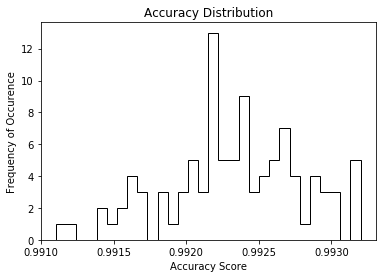

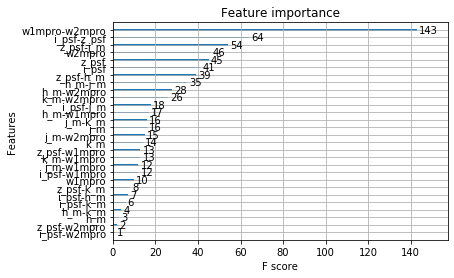

In [5]:
best_preds, best_model, best_results, all_results_skymapper = xgbooster.XGBoost_Model(
    'skymapper_30nestimators', train, flist, label_list, 0.50, n_iter=100,n_estimators=30)

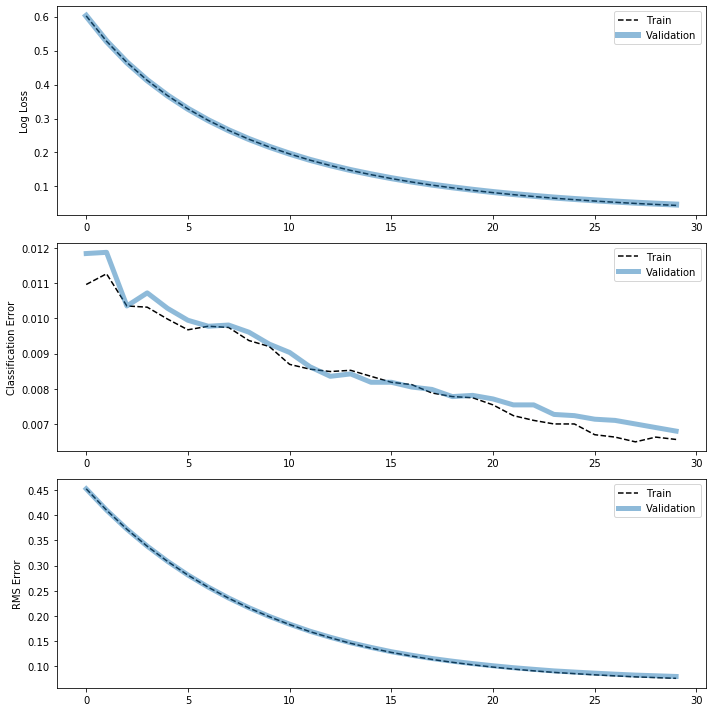

In [6]:
results = best_model.evals_result()
epochs = range(len(best_results['validation_0']['error']))
# plot log loss
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].plot(epochs, results['validation_0']['logloss'], 'k--', label='Train')
ax[0].plot(epochs, results['validation_1']['logloss'], label='Validation', lw=6, alpha=0.5)
ax[0].legend()
ax[0].set_ylabel('Log Loss')

ax[1].plot(epochs, results['validation_0']['error'], 'k--', label='Train')
ax[1].plot(epochs, results['validation_1']['error'], label='Validation', lw=5, alpha=0.5)
ax[1].legend()
ax[1].set_ylabel('Classification Error')

ax[2].plot(epochs, results['validation_0']['rmse'], 'k--', label='Train')
ax[2].plot(epochs, results['validation_1']['rmse'], label='Validation', lw=5, alpha=0.5)
ax[2].legend()
ax[2].set_ylabel('RMS Error')

plt.tight_layout()
plt.savefig('/Users/roberttejada/Desktop/skymapper20190930/metric_plots.pdf')
plt.show()

In [7]:
skymapper_refset = pd.read_csv('/Users/roberttejada/Desktop/gaia_data_ml/skymapper_merged_all.csv')

In [8]:
#skymapper_refset['M_G'] = abs_mag(skymapper_refset['parallax'].values,
                                  #skymapper_refset['phot_g_mean_mag'].values)

refset = skymapper_refset[['object_id', 'i_psf', 'z_psf',
                           'Hmag_x', 'Jmag_x', 'Kmag_x', 'W1mag', 'W2mag'
                           # ,'M_G'
                           ]].dropna(how='any')

refset_4preds = refset[['i_psf', 'z_psf',
                        'Hmag_x', 'Jmag_x', 'Kmag_x',
                        'W1mag', 'W2mag'
                        # ,'M_G'
                        ]]

refset_4preds = refset_4preds.rename(index=str, columns={"Hmag_x": "h_m",
                                                         "Jmag_x": "j_m", "Kmag_x": "k_m",
                                                         "W1mag": "w1mpro", "W2mag": "w2mpro"})
print('refset read')

refset read


In [9]:
features_colors = ccombinator(refset_4preds)

features_ref = features_colors.join(refset_4preds, how='outer')

smpredictions = best_model.predict(features_ref)
print('SkyMapper Predictions:', Counter(smpredictions))


# In[ ]:


refset.insert(loc=8, column='xgb_predictions', value=smpredictions)

df = refset[['object_id', 'xgb_predictions']]

smrefset_wpreds = skymapper_refset.merge(df, how='inner', on='object_id')

# In[ ]:


#g_rp = smrefset_wpreds['phot_g_mean_mag'] - smrefset_wpreds['phot_rp_mean_mag']

#smrefset_wpreds['g_rp'] = g_rp

SkyMapper Predictions: Counter({'other': 4651352, 'lowmass*': 1235625})


In [10]:
smrefset_par = smrefset_wpreds[(smrefset_wpreds['parallax'] > 0)]


# In[ ]:


#gaia_test = smrefset_par[['g_rp', 'phot_g_mean_mag', 'parallax', 'M_G',
                          #'xgb_predictions']].dropna(how='any')

giants_pred = smrefset_par[smrefset_par['xgb_predictions'] == 'other']
dwarfs_pred = smrefset_par[smrefset_par['xgb_predictions'] == 'lowmass*']


print('giant/dwarf ratio is:', len(giants_pred)/len(dwarfs_pred))
print('Giant predictions:', len(giants_pred))
print('Dwarf predictions:', len(dwarfs_pred))

giant/dwarf ratio is: 2.3151438785676612
Giant predictions: 395033
Dwarf predictions: 170630


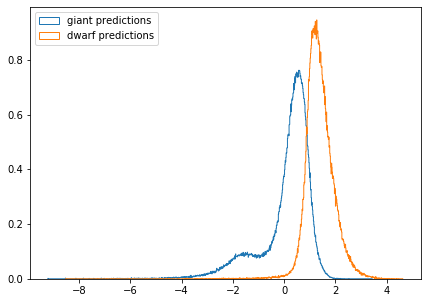

In [11]:
plt.figure(figsize=(7,5))
plt.hist(np.log(giants_pred['parallax']),bins=1000,histtype='step',density=True,label='giant predictions')
plt.hist(np.log(dwarfs_pred['parallax']),bins=1000,histtype='step',density=True,label='dwarf predictions')
plt.legend(loc='upper left')
plt.savefig('/Users/roberttejada/Desktop/skymapper_30nestimators20190930/parallax_plot.pdf')
#plt.show()